In [62]:
!pip install citipy

In [202]:
from citipy import citipy
import pandas as pd

In [64]:
import numpy as np

In [243]:
#generate random lats and lngs
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)

In [244]:
lat_lngs=list(zip(lats,lngs))   # make latitude and longitude pairs

In [172]:
import time

In [245]:
# get the city name from citipy by random lats and lngs pairs
cities=[]
countries=[]
for lat_lng in lat_lngs:
    city=citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    country=citipy.nearest_city(lat_lng[0],lat_lng[1]).country_code
    if city not in cities:   # only add unique city to the city list
        cities.append(city)
        countries.append(country)

In [247]:
len(cities) # check if more than 500 cities added to the list

594

In [251]:
cities_countries=list(zip(cities,countries))  # pair city and country

In [148]:
from api_keys import api_key            # import openweathermap api key
import requests

In [252]:
# generate dataframe
df=pd.DataFrame(cities_countries)
df.columns=['City','Country']
df['Lat']=''
df['Lng']=''
df['Date']=''
df['Temp']=''
df['Cloudiness']=''
df['Humidity']=''
df['Wind speed']=''
df=df.set_index('City')

In [254]:
# pull API infomation from openweathermap according to city and country
# loop through each row to add all column information using .loc
# pause 1 sec between each api call by time.sleep(1)

base_url='http://api.openweathermap.org/data/2.5/weather?'
appid=api_key
response=[]
i=1
print ('Begining processing\n')
for city_country in cities_countries:
    url=f'{base_url}appid={appid}&q={city_country[0]},{city_country[1]}'
    r=requests.get(url).json()
    if r['cod']=='404':
        print ('City Not Found, skipping')
    else:
        print (f'processing request {i}: city name --- {city_country[0].capitalize()},{city_country[1].upper()}')    
        df.loc[city_country[0],'Lat']=r['coord']['lat']
        df.loc[city_country[0],'Lng']=r['coord']['lon']
        df.loc[city_country[0],'Date']=r['dt']
        df.loc[city_country[0],'Temp']=r['main']['temp']
        df.loc[city_country[0],'Cloudiness']=r['clouds']['all']
        df.loc[city_country[0],'Humidity']=r['main']['humidity']
        df.loc[city_country[0],'Wind speed']=r['wind']['speed']  
    time.sleep(1)
    i+=1

Begining processing

City Not Found, skipping
processing request 2: city name --- Rocha,UY
processing request 3: city name --- Hermanus,ZA
processing request 4: city name --- Fortuna,US
processing request 5: city name --- Busselton,AU
processing request 6: city name --- Killybegs,IE
processing request 7: city name --- Bluff,NZ
processing request 8: city name --- Punta arenas,CL
processing request 9: city name --- Beloha,MG
processing request 10: city name --- Bambous virieux,MU
processing request 11: city name --- East london,ZA
processing request 12: city name --- Vao,NC
processing request 13: city name --- Esperance,AU
processing request 14: city name --- Zaysan,KZ
processing request 15: city name --- Ushuaia,AR
processing request 16: city name --- Quepos,CR
processing request 17: city name --- Saskylakh,RU
City Not Found, skipping
processing request 19: city name --- Kosh-agach,RU
City Not Found, skipping
processing request 21: city name --- Veraval,IN
processing request 22: city na

City Not Found, skipping
processing request 179: city name --- Nagato,JP
processing request 180: city name --- Dhidhdhoo,MV
processing request 181: city name --- Karasburg,NA
processing request 182: city name --- Saint-pierre,PM
processing request 183: city name --- Raudeberg,NO
processing request 184: city name --- Mizdah,LY
processing request 185: city name --- Huntsville,US
processing request 186: city name --- Lagoa,PT
processing request 187: city name --- Tumaco,CO
processing request 188: city name --- Erenhot,CN
City Not Found, skipping
processing request 190: city name --- Poum,NC
processing request 191: city name --- Novyy urengoy,RU
processing request 192: city name --- Cherskiy,RU
processing request 193: city name --- Chabahar,IR
processing request 194: city name --- Farafangana,MG
processing request 195: city name --- Sao paulo de olivenca,BR
City Not Found, skipping
processing request 197: city name --- Cabatuan,PH
processing request 198: city name --- Sur,OM
processing req

processing request 356: city name --- Orbetello,IT
processing request 357: city name --- Hirara,JP
processing request 358: city name --- Kuching,MY
processing request 359: city name --- Omboue,GA
processing request 360: city name --- Kemi,FI
City Not Found, skipping
processing request 362: city name --- Dukat,RU
processing request 363: city name --- Mangai,CD
processing request 364: city name --- Lotoshino,RU
processing request 365: city name --- Kargasok,RU
processing request 366: city name --- Jacksonville,US
processing request 367: city name --- Phalodi,IN
processing request 368: city name --- Okato,NZ
processing request 369: city name --- Mareeba,AU
processing request 370: city name --- Leningradskiy,RU
processing request 371: city name --- Jejuri,IN
processing request 372: city name --- Gizo,SB
processing request 373: city name --- Leh,IN
processing request 374: city name --- Filadelfia,PY
processing request 375: city name --- Hovd,MN
processing request 376: city name --- Laurel,U

processing request 530: city name --- Shenavan,AM
processing request 531: city name --- Port augusta,AU
processing request 532: city name --- Kimbe,PG
processing request 533: city name --- Pomabamba,PE
processing request 534: city name --- Tikrit,IQ
processing request 535: city name --- Synya,RU
processing request 536: city name --- Pangnirtung,CA
processing request 537: city name --- Altea,ES
City Not Found, skipping
processing request 539: city name --- Saryg-sep,RU
City Not Found, skipping
processing request 541: city name --- Moyale,ET
processing request 542: city name --- Antequera,PY
processing request 543: city name --- Kharan,PK
processing request 544: city name --- Ingham,AU
processing request 545: city name --- Jiuquan,CN
processing request 546: city name --- Peniche,PT
processing request 547: city name --- Sobolevo,RU
processing request 548: city name --- Dodoma,TZ
processing request 549: city name --- Dubrovnik,HR
processing request 550: city name --- Do gonbadan,IR
process

In [266]:
df.head()

,Country,Lat,Lng,Date,Temp,Cloudiness,Humidity,Wind speed
City,,,,,,,,
toliary,mg,,,,,,,
rocha,uy,-34.48,-54.34,1551644319,298.497,0,41,3.32
hermanus,za,-34.42,19.24,1551644255,291.06,0,92,0.45
fortuna,us,40.6,-124.16,1551644170,286.05,90,100,2.6
busselton,au,-33.64,115.35,1551643995,290.09,0,43,8.92


In [267]:
# replace empty value with null
df['Lat'].replace('', np.nan, inplace=True)

In [271]:
# delete the rows with null value
df.dropna(inplace=True)

In [290]:
# change data type from object to numeric value
df[['Temp','Cloudiness','Humidity','Wind speed']] = df[['Temp','Cloudiness','Humidity','Wind speed']].apply(pd.to_numeric)

In [306]:
# convert kelvin to F
df['Temp (F)']=(df['Temp']-273.15) * 9/5 + 32
df=df.drop('Temp',axis=1)

KeyError: 'Temp'

In [319]:
df.to_csv('random cities weather.csv')  # save the file to csv

In [307]:
df.count() # check again to see if more than 500 cities were obtained.

Country       513
Lat           513
Lng           513
Date          513
Cloudiness    513
Humidity      513
Wind speed    513
Temp (F)      513
dtype: int64

In [276]:
import matplotlib.pyplot as plt

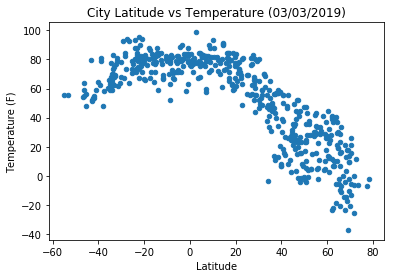

In [316]:
# scatter plot to compare latitude versus temperature
df.plot("Lat","Temp (F)",kind = 'scatter')
plt.title('City Latitude vs Temperature (03/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Temp')


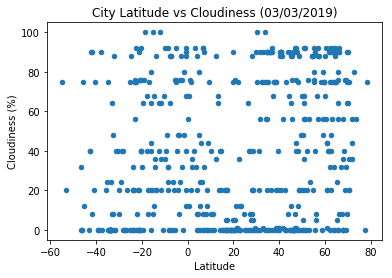

In [320]:
# scatter plot to compare latitude versus cloudiness
df.plot("Lat","Cloudiness",kind = 'scatter')
plt.title('City Latitude vs Cloudiness (03/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Cloudiness')

In [321]:
# delete stange humidity data which is bigger than 100 %
df=df[df['Humidity']<=100]

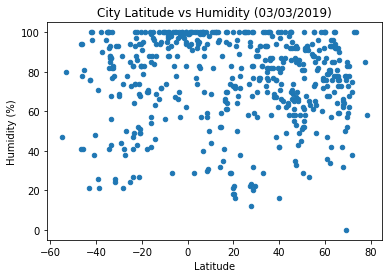

In [322]:
# scatter plot to compare latitude versus humidity
df.plot("Lat","Humidity",kind = 'scatter')
plt.title('City Latitude vs Humidity (03/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Humidity')

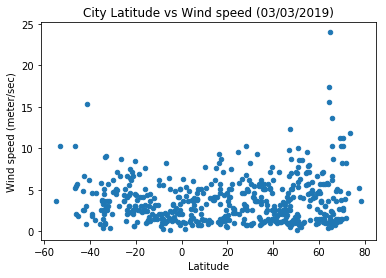

In [323]:
# scatter plot to compare latitude versus wind speed
df.plot("Lat","Wind speed",kind = 'scatter')
plt.title('City Latitude vs Wind speed (03/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind speed (meter/sec)')
plt.savefig('Wind speed')